In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
df = pd.read_csv('datasets/survey_results_public.csv')
schema = pd.read_csv('datasets/survey_results_schema.csv')


In [61]:
num_vars = df[['Respondent', 'Salary',
               'ExpectedSalary', 'Gender', 'EmploymentStatus']]


In [62]:
print(num_vars.shape)
def fill_mean(col): return col.fillna(col.mean())  # Ortalama fonksiyonu


# Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['Salary'], axis=0)
# fill_df = num_vars.apply(fill_mean, axis=0) # Eksik değerleri sütun ortalamalarıyla doldur.

# Test görünümü
drop_sal_df.head()
print(drop_sal_df.shape)


(51392, 5)
(12891, 5)


In [69]:
print(drop_sal_df["Gender"].value_counts(dropna=False))

Gender
Male                                                       10666
NaN                                                         1182
Female                                                       819
Other                                                         49
Male; Other                                                   44
Gender non-conforming                                         43
Male; Gender non-conforming                                   21
Female; Transgender                                           19
Female; Gender non-conforming                                 13
Transgender                                                    8
Male; Female; Transgender; Gender non-conforming; Other        6
Male; Female                                                   5
Transgender; Gender non-conforming                             4
Male; Transgender                                              4
Female; Transgender; Gender non-conforming                     3
Male; Female; Othe

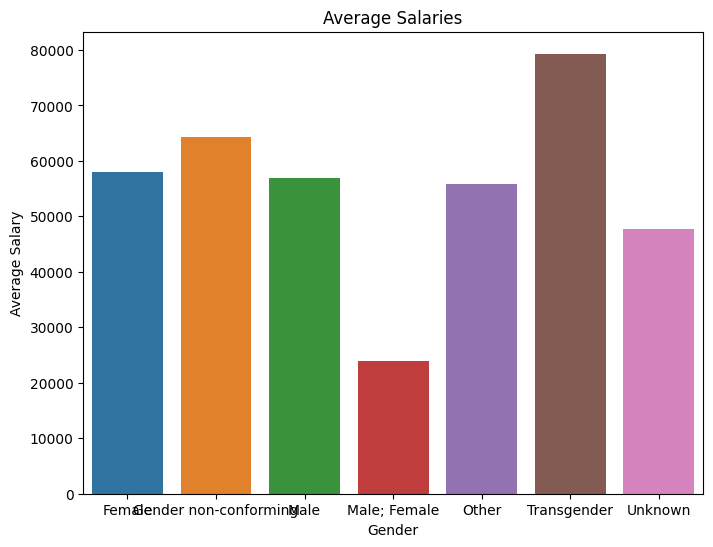

In [64]:
terms_to_replace = ['Other', 'Gender non-conforming',
                    'non-conforming', 'Transgender']
replacement_terms = ['Other', 'Gender non-conforming',
                     'non-conforming', 'Transgender']

# Reduce Gender Column to analyze better


def replace_terms(text):
    if isinstance(text, str):
        for i, term in enumerate(terms_to_replace):
            if term in text:
                return replacement_terms[i]
                break
    return text


df_visualization = drop_sal_df.copy()
# Apply the replacement function to the Gender column
df_visualization['Gender'] = df_visualization['Gender'].apply(replace_terms)


# Cinsiyet sütunundaki NaN değerleri dolduralım
df_visualization['Gender'].fillna('Unknown', inplace=True)

# Kırılıma göre ortalama maaşları hesaplayalım
average_salary_by_gender = df_visualization.groupby('Gender')['Salary'].mean().reset_index()

# Bar plot'u çizdirelim
plt.figure(figsize=(8, 6))
sns.barplot(data=average_salary_by_gender, x='Gender', y='Salary')
plt.title('Average Salaries')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()


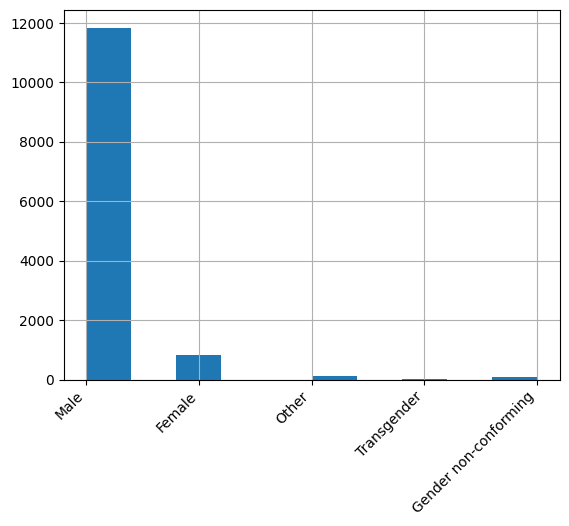

In [73]:
df_visualization['Gender'].hist()
plt.xticks(rotation=45, ha='right')
plt.show()

How about we remove empty values with mode of the Gender database.

In [65]:
df_visualization['Gender'] = df_visualization['Gender'].replace(
    "Unknown", df['Gender'].mode()[0])
df_visualization = df_visualization[df_visualization.Gender != "Male; Female"]


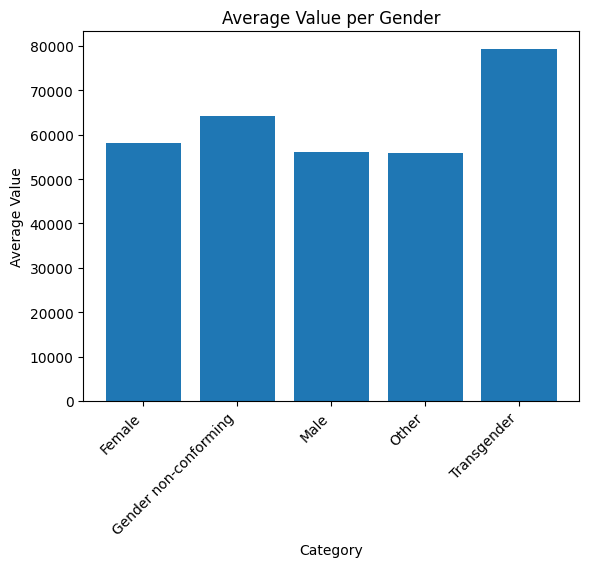

In [66]:
avg_values = df_visualization.groupby('Gender')['Salary'].mean()
# Create a bar plot
plt.bar(avg_values.index, avg_values)
plt.xlabel('Category')
plt.ylabel('Average Value')
plt.xticks(rotation=45, ha='right')
plt.title('Average Value per Gender')
plt.show()


We can say that nan values have almost no effect on average values. But do we know anything about employment status?

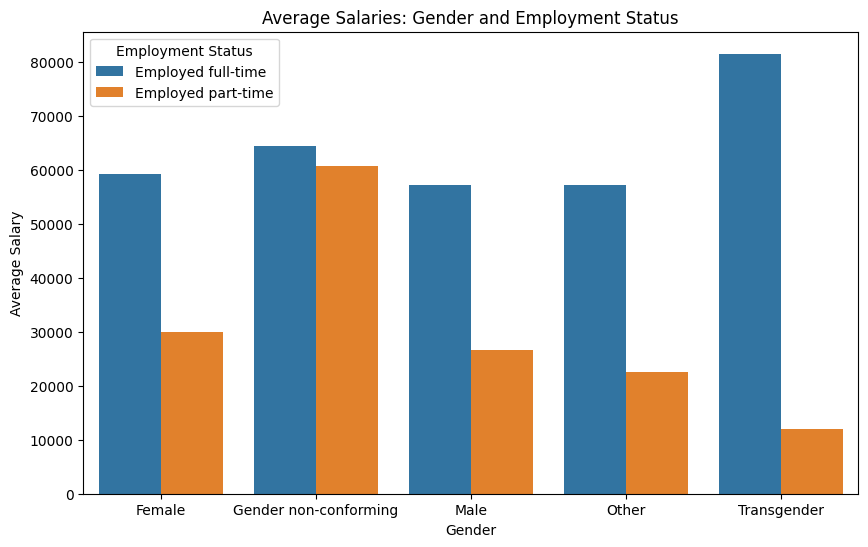

In [67]:
average_salary_by_group = df_visualization.groupby(
    ['Gender', 'EmploymentStatus'])['Salary'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_salary_by_group, x='Gender',
            y='Salary', hue='EmploymentStatus')
plt.title('Average Salaries: Gender and Employment Status')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.legend(title='Employment Status')
plt.show()
